## Imports

In [129]:
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [130]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
X_train = train.iloc[:,0:len(train.columns)-1]
Y_train = train.iloc[:,-1]
X_test = test.iloc[:,0:len(test.columns)-1]
Y_test = test.iloc[:,-1]

#print(pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False))

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

le = LabelEncoder()
Y_test = le.fit_transform(Y_test)

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
print(Y_train)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}
[2 2 2 ... 5 5 5]


## EDA

In [7]:
X_train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,...,fBodyAccMag-meanFreq(),fBodyAccMag-skewness(),fBodyAccMag-kurtosis(),fBodyBodyAccJerkMag-mean(),fBodyBodyAccJerkMag-std(),fBodyBodyAccJerkMag-mad(),fBodyBodyAccJerkMag-max(),fBodyBodyAccJerkMag-min(),fBodyBodyAccJerkMag-sma(),fBodyBodyAccJerkMag-energy(),fBodyBodyAccJerkMag-iqr(),fBodyBodyAccJerkMag-entropy(),fBodyBodyAccJerkMag-maxInds,fBodyBodyAccJerkMag-meanFreq(),fBodyBodyAccJerkMag-skewness(),fBodyBodyAccJerkMag-kurtosis(),fBodyBodyGyroMag-mean(),fBodyBodyGyroMag-std(),fBodyBodyGyroMag-mad(),fBodyBodyGyroMag-max(),fBodyBodyGyroMag-min(),fBodyBodyGyroMag-sma(),fBodyBodyGyroMag-energy(),fBodyBodyGyroMag-iqr(),fBodyBodyGyroMag-entropy(),fBodyBodyGyroMag-maxInds,fBodyBodyGyroMag-meanFreq(),fBodyBodyGyroMag-skewness(),fBodyBodyGyroMag-kurtosis(),fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-std(),fBodyBodyGyroJerkMag-mad(),fBodyBodyGyroJerkMag-max(),fBodyBodyGyroJerkMag-min(),fBodyBodyGyroJerkMag-sma(),fBodyBodyGyroJerkMag-energy(),fBodyBodyGyroJerkMag-iqr(),fBodyBodyGyroJerkMag-entropy(),fBodyBodyGyroJerkMag-maxInds,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,-0.306043,-0.557121,0.523551,0.387386,0.594374,-0.547569,-0.820041,-0.901874,-0.845784,-0.684345,-0.643770,-0.631069,-0.102993,-0.137937,-0.163946,-0.116599,0.102762,-0.037786,0.130477,-0.026229,0.026322,0.159966,-0.019575,0.009420,0.033291,0.036587,-0.078640,-0.125131,-0.193802,0.105005,0.6

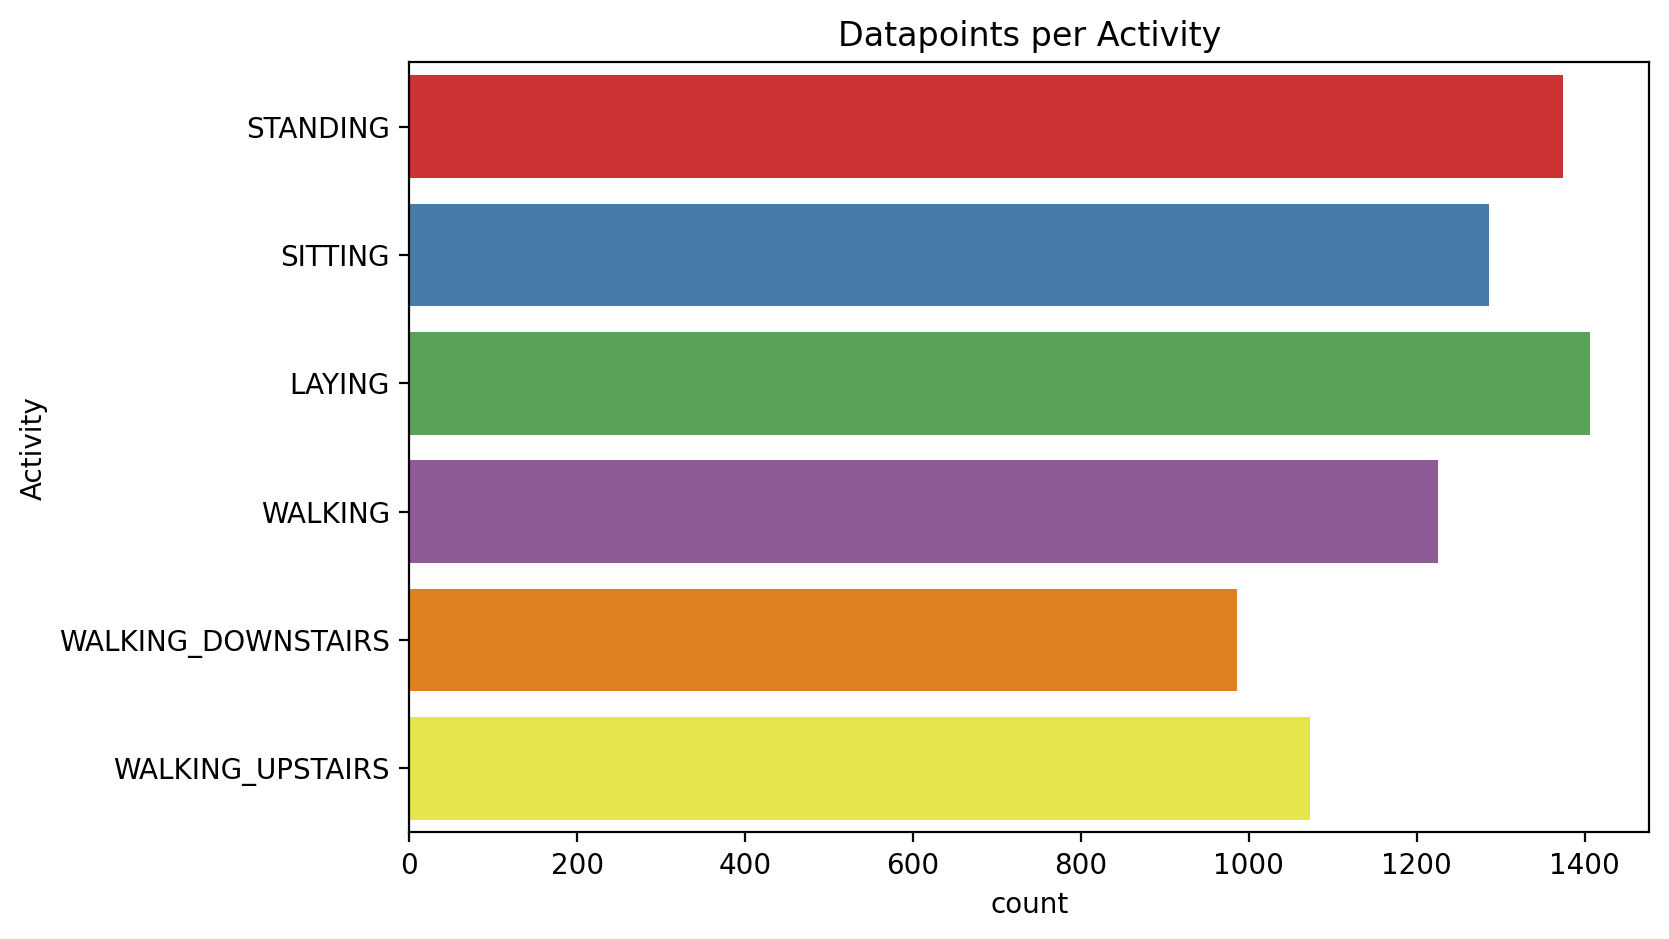

In [8]:
plt.figure(figsize=(8,5))
plt.title('Datapoints per Activity', fontsize=12)
sns.countplot(y='Activity', data=train, palette="Set1")
plt.show()

<Figure size 1400x700 with 0 Axes>

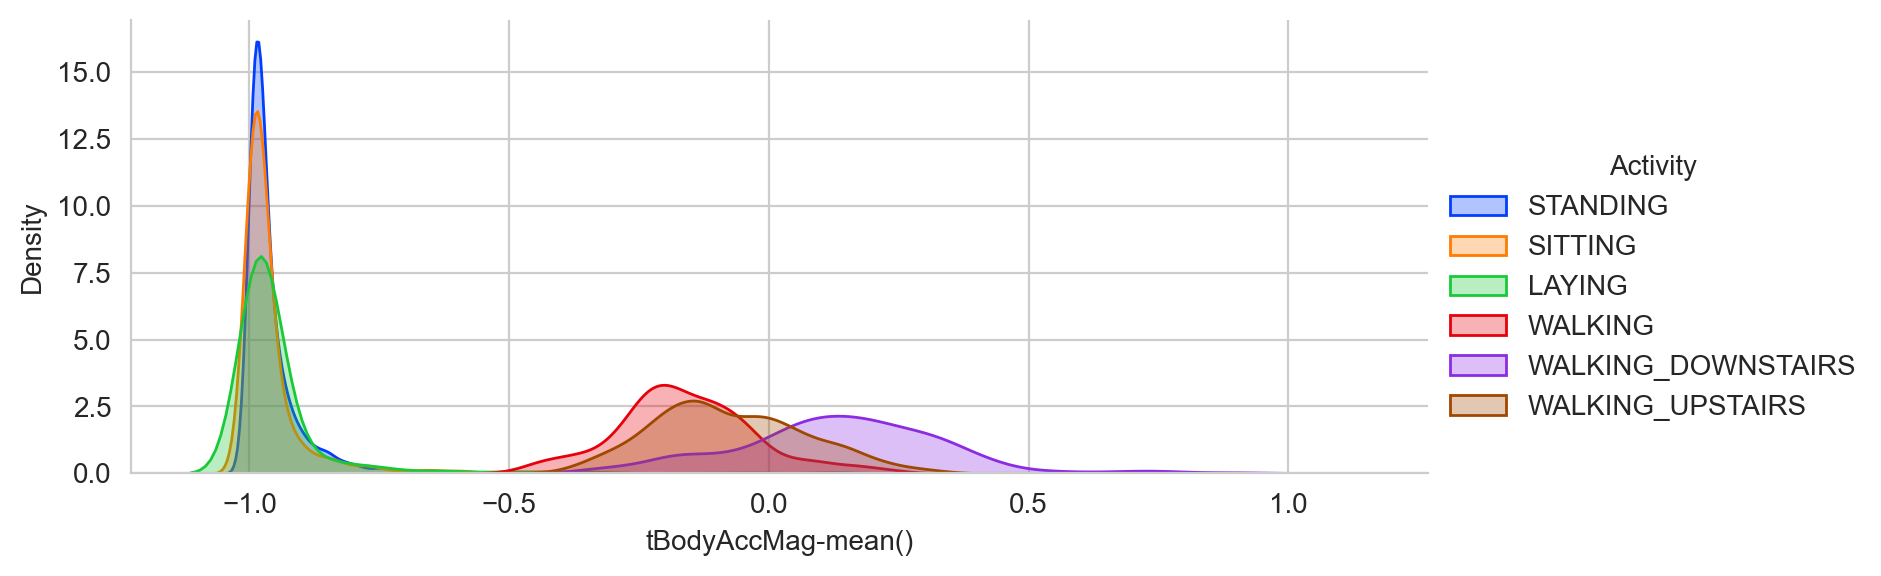

In [9]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,7))
facetgrid = sns.FacetGrid(train, hue='Activity',aspect=2.5, palette='bright')
facetgrid.map(sns.kdeplot,'tBodyAccMag-mean()', fill=True, alpha=0.3).add_legend()
plt.show()

In [8]:
# le = LabelEncoder()
# Y_train = le.fit_transform(Y_train)

# le = LabelEncoder()
# Y_test = le.fit_transform(Y_test)

# le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# print(le_name_mapping)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}


## Regression part a

### 1

In [131]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the datasets
train_data = pd.read_csv('input/train.csv')
test_data = pd.read_csv('input/test.csv')

# Selecting independent variables (dropping the target variables and non-predictor columns)
X = train_data.drop(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'subject', 'Activity'], axis=1)

# Preparing the dependent variables
y_X = train_data['tBodyAcc-mean()-X']
y_Y = train_data['tBodyAcc-mean()-Y']
y_Z = train_data['tBodyAcc-mean()-Z']

# Standardizing the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [132]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

model_X = LinearRegression()
scores_X = cross_val_score(model_X, X_scaled, y_X, cv=5, scoring='neg_mean_squared_error')

model_Y = LinearRegression()
scores_Y = cross_val_score(model_Y, X_scaled, y_Y, cv=5, scoring='neg_mean_squared_error')

model_Z = LinearRegression()
scores_Z = cross_val_score(model_Z, X_scaled, y_Z, cv=5, scoring='neg_mean_squared_error')

mean_score_X = np.mean(scores_X)
std_score_X = np.std(scores_X)

mean_score_Y = np.mean(scores_Y)
std_score_Y = np.std(scores_Y)

mean_score_Z = np.mean(scores_Z)
std_score_Z = np.std(scores_Z)


print("Mean Squared Error for tBodyAcc-mean()-X: %0.5f (+/- %0.5f)" % (mean_score_X, std_score_X * 2))
print("Mean Squared Error for tBodyAcc-mean()-Y: %0.5f (+/- %0.5f)" % (mean_score_Y, std_score_Y * 2))
print("Mean Squared Error for tBodyAcc-mean()-Z: %0.5f (+/- %0.5f)" % (mean_score_Z, std_score_Z * 2))


Mean Squared Error for tBodyAcc-mean()-X: -0.00196 (+/- 0.00132)
Mean Squared Error for tBodyAcc-mean()-Y: -0.00148 (+/- 0.00317)
Mean Squared Error for tBodyAcc-mean()-Z: -0.00265 (+/- 0.00521)


### 2

In [134]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

lambdas = np.logspace(-4, 4, 100)


mse_X = []
mse_Y = []
mse_Z = []

for l in lambdas:
    model_X_l = Ridge(alpha=l)
    model_Y_l = Ridge(alpha=l)
    model_Z_l = Ridge(alpha=l)
    
    scores_X_l = cross_val_score(model_X_l, X_scaled, y_X, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    scores_Y_l = cross_val_score(model_Y_l, X_scaled, y_Y, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    scores_Z_l = cross_val_score(model_Z_l, X_scaled, y_Z, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    
    mse_X.append(-np.mean(scores_X_l))
    mse_Y.append(-np.mean(scores_Y_l))
    mse_Z.append(-np.mean(scores_Z_l))

plt.figure(figsize=(10, 6))
plt.plot(lambdas, mse_X, label='tBodyAcc-mean()-X')
plt.plot(lambdas, mse_Y, label='tBodyAcc-mean()-Y')
plt.plot(lambdas, mse_Z, label='tBodyAcc-mean()-Z')
plt.xscale('log')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Generalization Error as a Function of Lambda')
plt.legend()
plt.grid(True)
plt.show()


In [137]:
optimal_lambda_X = 45.3
optimal_lambda_Y = 138.5
optimal_lambda_Z = 200.9


model_X = Ridge(alpha=optimal_lambda_X).fit(X_scaled, y_X)
model_Y = Ridge(alpha=optimal_lambda_Y).fit(X_scaled, y_Y)
model_Z = Ridge(alpha=optimal_lambda_Z).fit(X_scaled, y_Z)

coefficients_X = model_X.coef_
coefficients_Y = model_Y.coef_
coefficients_Z = model_Z.coef_

most_influential_X = np.argsort(np.abs(coefficients_X))[::-1][:5]
most_influential_Y = np.argsort(np.abs(coefficients_Y))[::-1][:5]
most_influential_Z = np.argsort(np.abs(coefficients_Z))[::-1][:5]

print("Features with highest influence for X:", most_influential_X)
print("Features with highest influence for Y:", most_influential_Y)
print("Features with highest influence for Z:", most_influential_Z)

Features with highest influence for X: [ 19   9   6 551  99]
Features with highest influence for Y: [ 20   7  10 100 285]
Features with highest influence for Z: [ 21   8  11  15 101]


In [143]:
# Print out the names of the features with the highest influence
print("Most influential features for X:", X.columns[most_influential_X])
print("Most influential features for Y:", X.columns[most_influential_Y])
print("Most influential features for Z:", X.columns[most_influential_Z])

Most influential features for X: Index(['tBodyAcc-entropy()-X', 'tBodyAcc-min()-X', 'tBodyAcc-max()-X',
       'angle(tBodyAccMean,gravity)', 'tBodyAccJerk-entropy()-X'],
      dtype='object')
Most influential features for Y: Index(['tBodyAcc-entropy()-Y', 'tBodyAcc-max()-Y', 'tBodyAcc-min()-Y',
       'tBodyAccJerk-entropy()-Y', 'fBodyAcc-entropy()-Y'],
      dtype='object')
Most influential features for Z: Index(['tBodyAcc-entropy()-Z', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-Z',
       'tBodyAcc-energy()-Z', 'tBodyAccJerk-entropy()-Z'],
      dtype='object')


In [51]:
train_data = pd.read_csv('input/train.csv')
X = train_data.drop(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'subject', 'Activity'], axis=1)
attributeNames = list(X.columns.values)
X = X.values
y_X = train_data['tBodyAcc-mean()-X']
y_Y = train_data['tBodyAcc-mean()-Y']
y_Z = train_data['tBodyAcc-mean()-Z']
y = y_X.values

## Logistic Regression

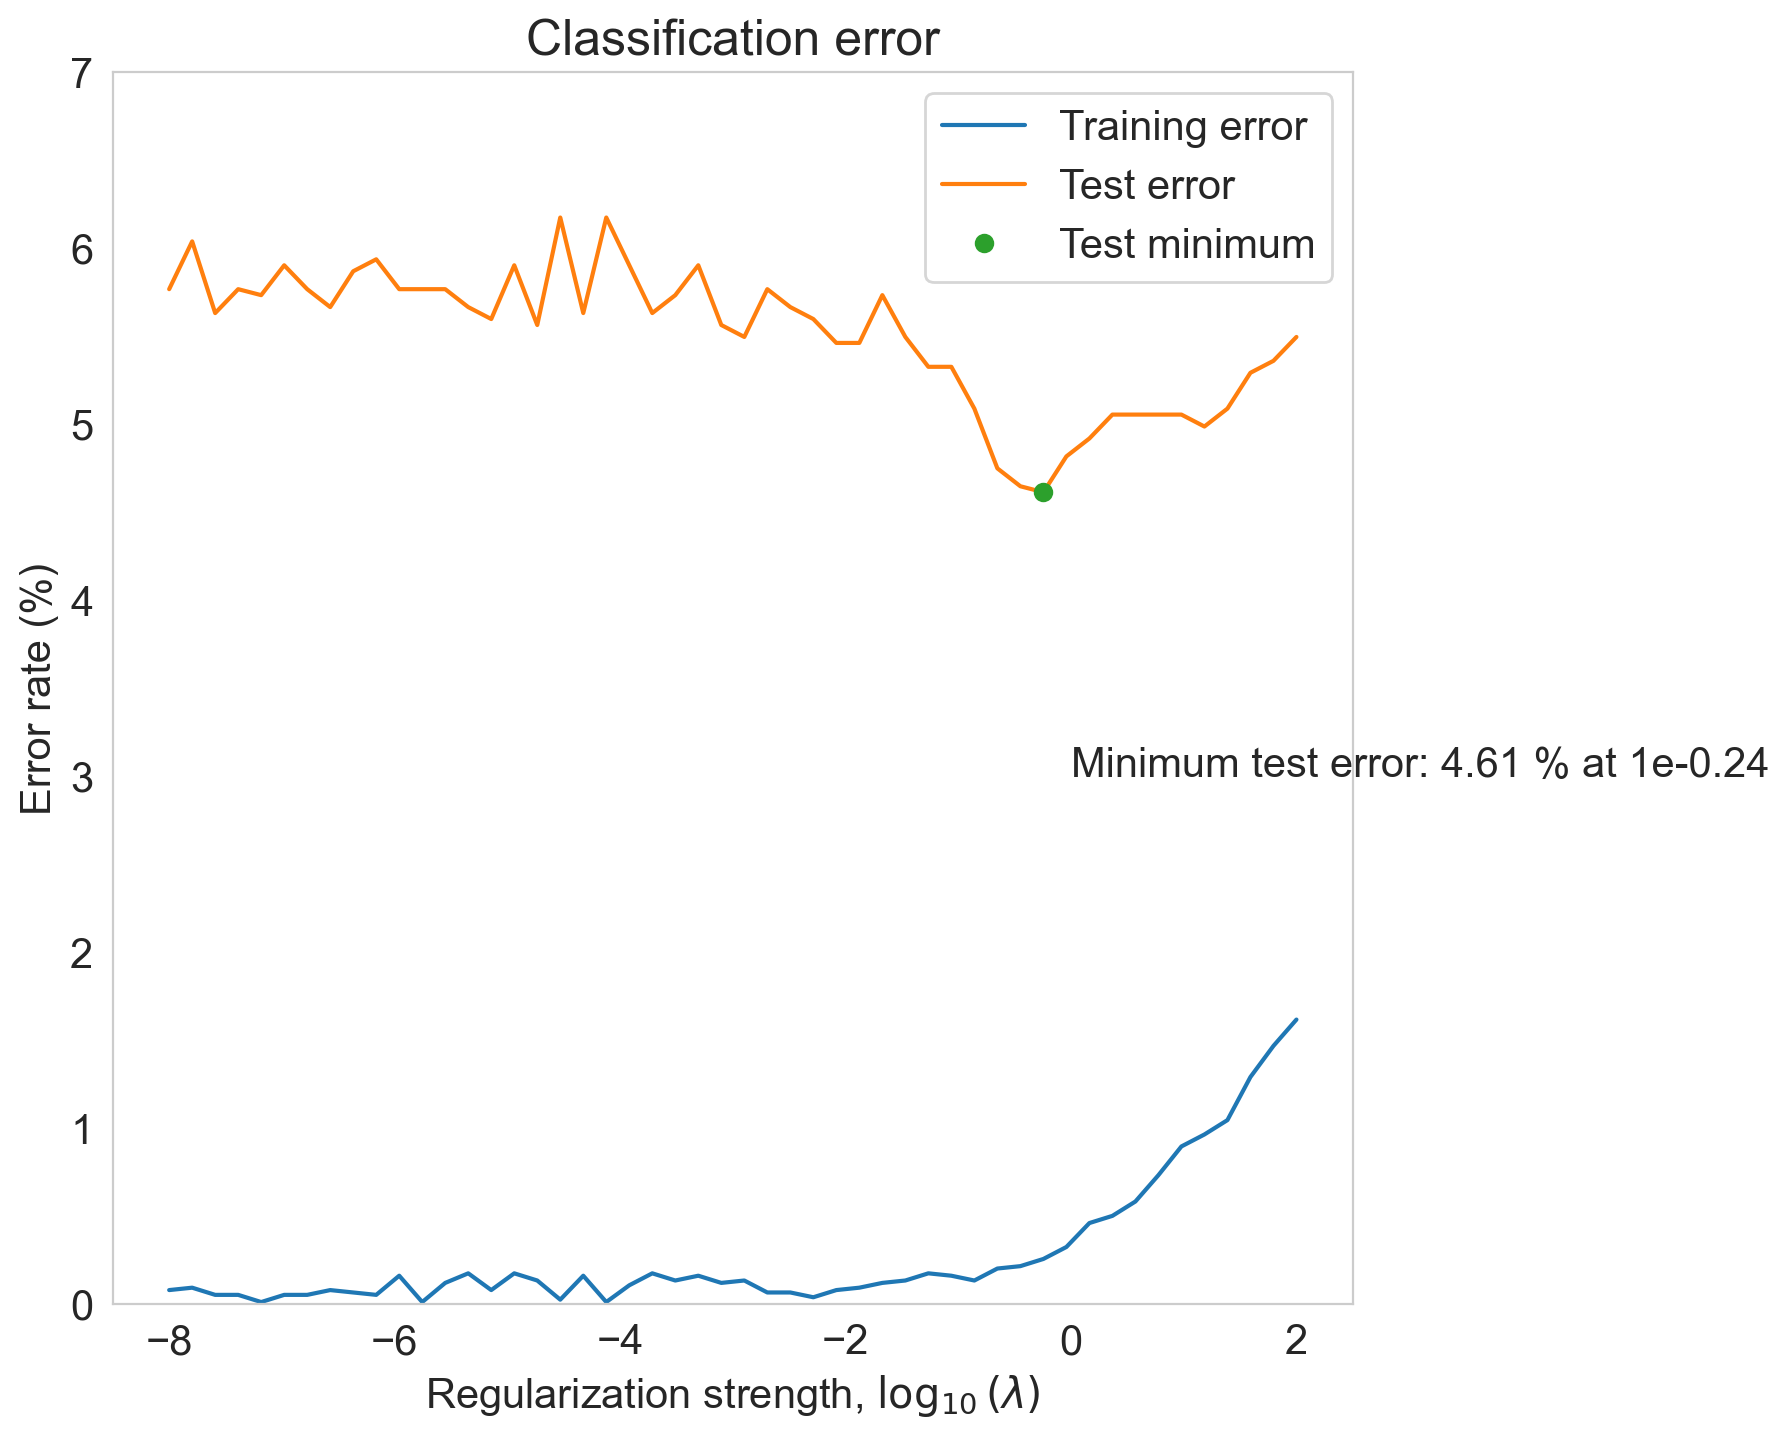

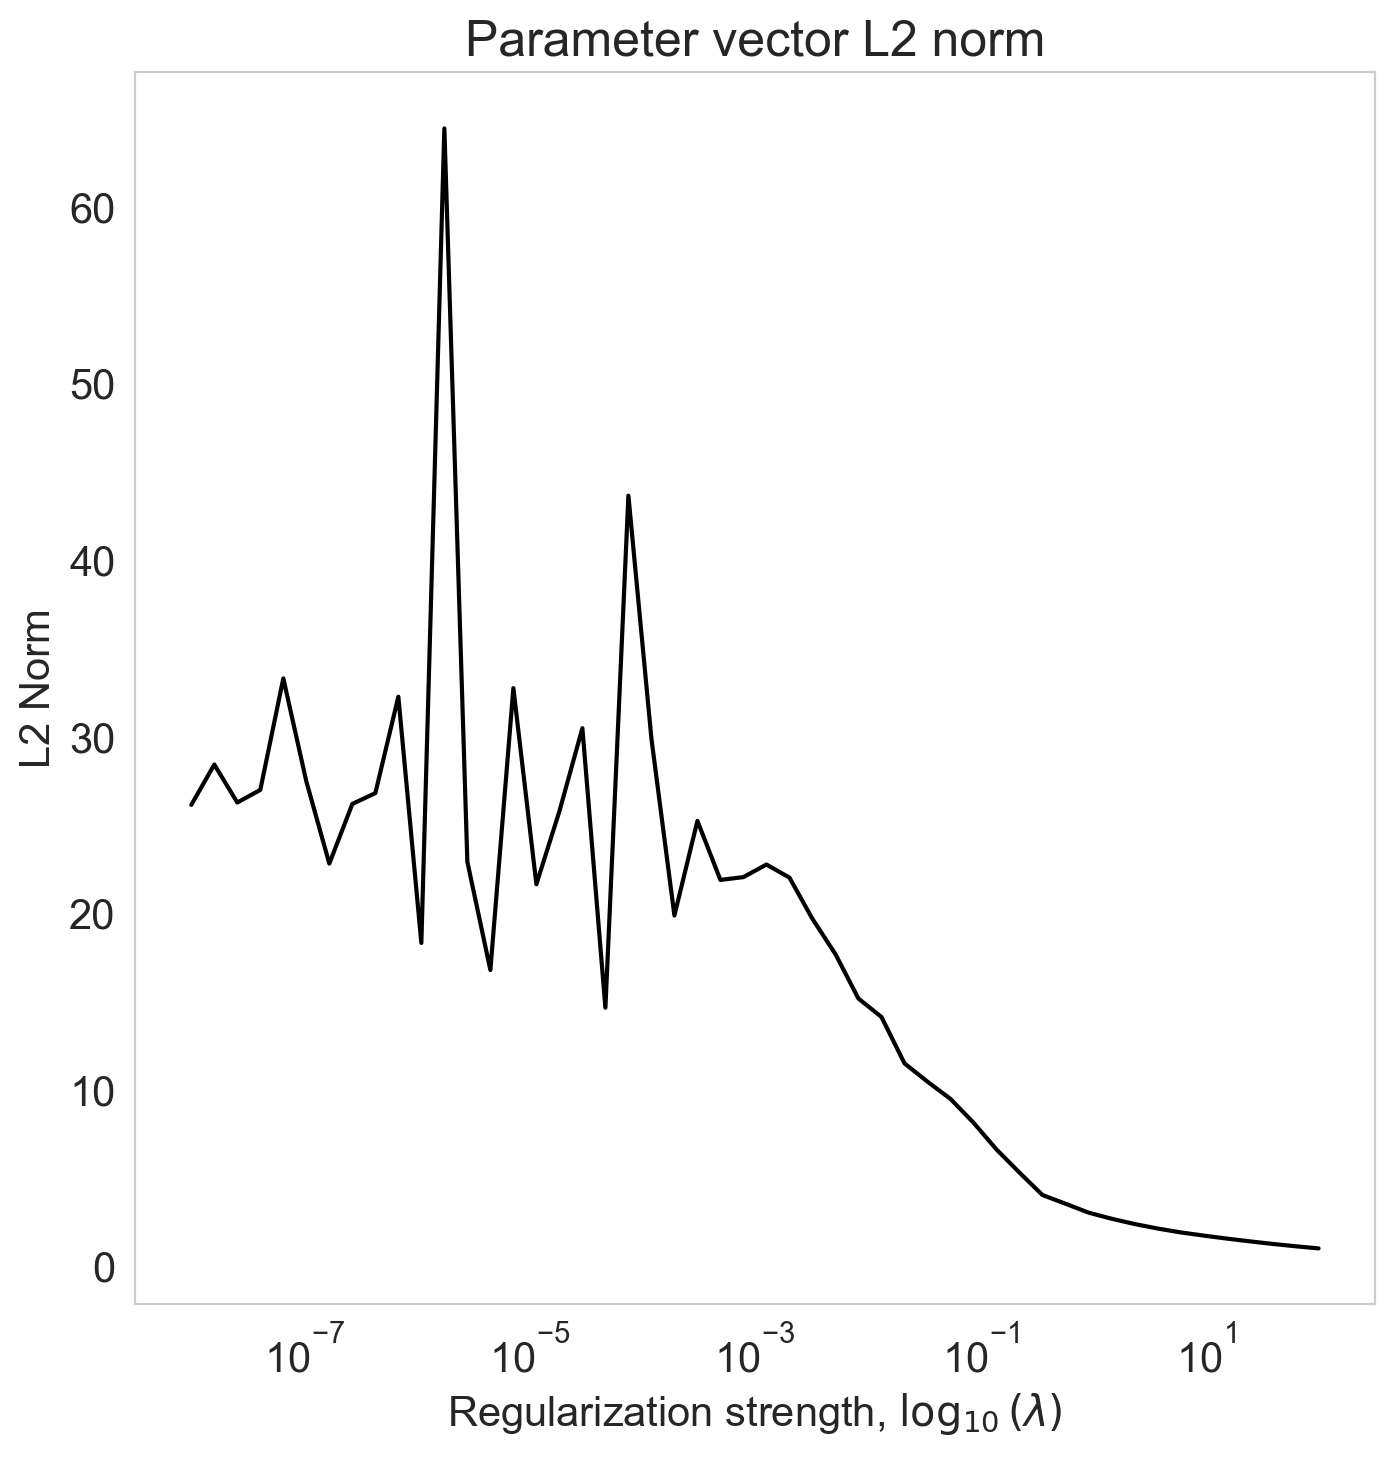

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from toolbox_02450 import rocplot, confmatplot


font_size = 15
plt.rcParams.update({'font.size': font_size})


train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
X_train = train.iloc[:,0:len(train.columns)-1] # -1 because we do not want the activity column
Y_train = train.iloc[:,-1]
X_train = X_train.to_numpy()

X_test = test.iloc[:,0:len(test.columns)-1]
X_test = X_test.to_numpy()
Y_test = test.iloc[:,-1]

le = LabelEncoder()
y_train = le.fit_transform(Y_train)

le = LabelEncoder()
y_test = le.fit_transform(Y_test)

# Standardize the training and set set based on training set mean and std
mu = np.mean(X_train, 0)
sigma = np.std(X_train, 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma

# Fit regularized logistic regression model to training data to predict the activity
lambda_interval = np.logspace(-8, 2, 50)
train_error_rate = np.zeros(len(lambda_interval))
test_error_rate = np.zeros(len(lambda_interval))
coefficient_norm = np.zeros(len(lambda_interval))
for k in range(0, len(lambda_interval)):
    mdl = LogisticRegression(penalty='l2', C=1/lambda_interval[k] )
    
    mdl.fit(X_train, y_train)

    y_train_est = mdl.predict(X_train).T
    y_test_est = mdl.predict(X_test).T
    
    train_error_rate[k] = np.sum(y_train_est != y_train) / len(y_train)
    test_error_rate[k] = np.sum(y_test_est != y_test) / len(y_test)

    w_est = mdl.coef_[0] 
    coefficient_norm[k] = np.sqrt(np.sum(w_est**2))

min_error = np.min(test_error_rate)
opt_lambda_idx = np.argmin(test_error_rate)
opt_lambda = lambda_interval[opt_lambda_idx]

plt.figure(figsize=(8,8))
plt.plot(np.log10(lambda_interval), train_error_rate*100)
plt.plot(np.log10(lambda_interval), test_error_rate*100)
plt.plot(np.log10(opt_lambda), min_error*100, 'o')
plt.text(1e-8, 3, "Minimum test error: " + str(np.round(min_error*100,2)) + ' % at 1e' + str(np.round(np.log10(opt_lambda),2)))
plt.xlabel('Regularization strength, $\log_{10}(\lambda)$')
plt.ylabel('Error rate (%)')
plt.title('Classification error')
plt.legend(['Training error','Test error','Test minimum'],loc='upper right')
plt.ylim([0, 7])
plt.grid()
plt.show()    

plt.figure(figsize=(8,8))
plt.semilogx(lambda_interval, coefficient_norm,'k')
plt.ylabel('L2 Norm')
plt.xlabel('Regularization strength, $\log_{10}(\lambda)$')
plt.title('Parameter vector L2 norm')
plt.grid()
plt.show()     

## Random forest classifier

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
df_train = pd.read_csv('input/train.csv')
X = pd.DataFrame(df_train.drop(['Activity','subject'],axis=1))
y = df_train.Activity.values.astype(object)
encoder = LabelEncoder()
y = encoder.fit_transform(y)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)
rand_clf = RandomForestClassifier(random_state=5)
rand_clf.fit(X_train, y_train)
rand_clf.score(X_test, y_test)

KeyboardInterrupt: 

## ANN Classification

In [22]:
# Hyperparameter tuning using GridSearchCV
grid_param={
    'n_estimators':[90,100,115,130],
    'criterion':['gini','entropy'],
    'max_depth':range(2,20,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'max_features':['auto','log2']
}
grid_search=GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(X_train,y_train)
grid_search.best_params_

KeyboardInterrupt: 

In [38]:
train = pd.read_csv('./input/train.csv')
test = pd.read_csv('./input/test.csv')
X_train = train.iloc[:,0:len(train.columns)-1]
Y_train = train.iloc[:,-1]
X_test = test.iloc[:,0:len(test.columns)-1]
Y_test = test.iloc[:,-1]

le = LabelEncoder()
Y_train = le.fit_transform(Y_train)

le = LabelEncoder()
Y_test = le.fit_transform(Y_test)

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)
print(Y_train)

{'LAYING': 0, 'SITTING': 1, 'STANDING': 2, 'WALKING': 3, 'WALKING_DOWNSTAIRS': 4, 'WALKING_UPSTAIRS': 5}
[2 2 2 ... 5 5 5]


### Neural network for classification

Predicting categories ie. the activities


Crossvalidation fold: 1/3
Iteration 0/300: test error: 1.7442480325698853
Accuracy:  0.1383108935128519
Iteration 100/300: test error: 0.49591749906539917
Accuracy:  0.828641370869033
Iteration 200/300: test error: 0.2973294258117676
Accuracy:  0.8955528355773154

Crossvalidation fold: 2/3
Iteration 0/300: test error: 0.17144030332565308
Accuracy:  0.9538963688290494
Iteration 100/300: test error: 0.12325702607631683
Accuracy:  0.9616483068135455
Iteration 200/300: test error: 0.10071129351854324
Accuracy:  0.9636882904936761

Crossvalidation fold: 3/3
Iteration 0/300: test error: 0.06230791285634041
Accuracy:  0.9853061224489796
Iteration 100/300: test error: 0.061286989599466324
Accuracy:  0.9828571428571429
Iteration 200/300: test error: 0.060293521732091904
Accuracy:  0.9812244897959184


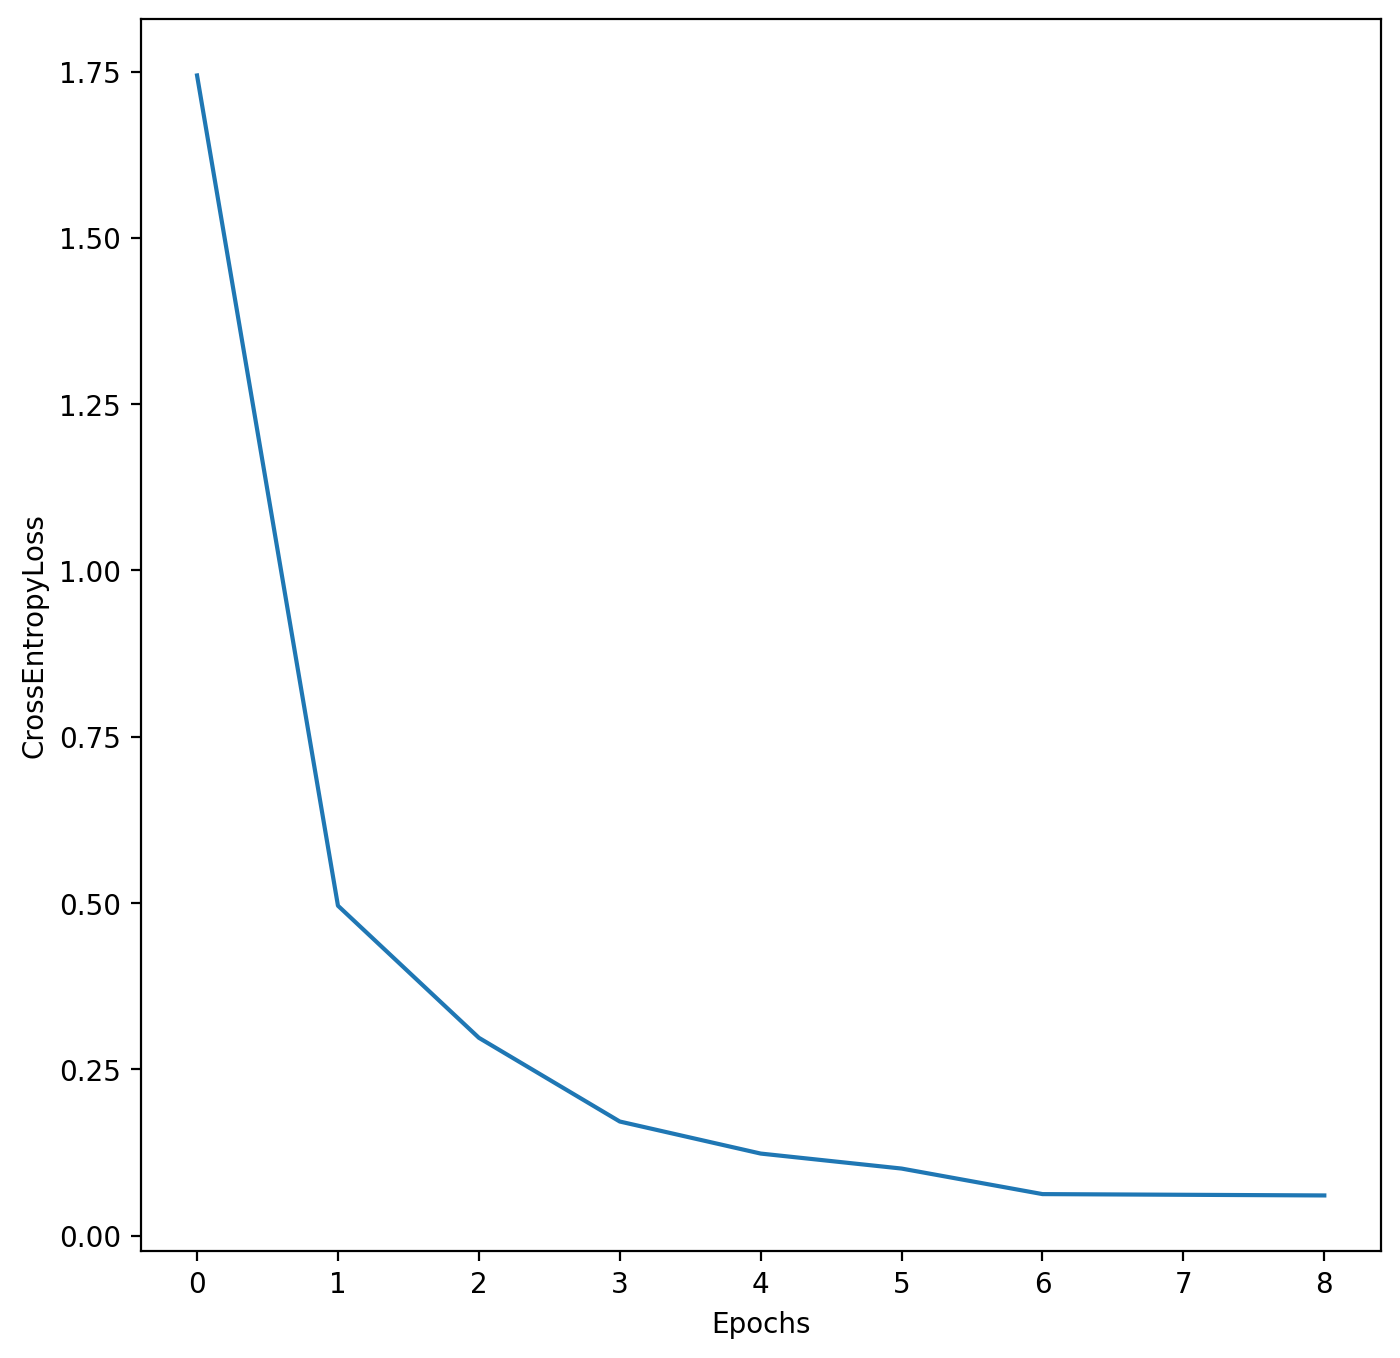

In [103]:
from torch import nn, Tensor
import torch.nn.functional as F
from torch.optim import Adam

n_hidden_units = 5
max_iter = 300
N, M = X.shape
y = Y_train

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        
        self.linear1 = nn.Linear(M, n_hidden_units)
        self.relu = nn.LeakyReLU()
        self.linear2 = nn.Linear(n_hidden_units, 6)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

model = SimpleNN()

loss_fn = nn.CrossEntropyLoss()
optim = Adam(model.parameters(), lr=0.001)

K = 3
CV = KFold(K, shuffle=True)

errors = [] # make a list for storing generalizaition error in each loop
y_onehot = np.zeros((y.shape[0], 6))
y_onehot[np.arange(y.shape[0]), y] = 1
y = y_onehot

for (k, (train_index, test_index)) in enumerate(CV.split(X,y)):
    model.train() # set model to training mode
    print('\nCrossvalidation fold: {0}/{1}'.format(k+1,K))    
    
    X_train = Tensor(X[train_index,:]).squeeze(0)
    y_train = Tensor(y[train_index]).squeeze(0)
    X_test = Tensor(X[test_index,:]).squeeze(0)
    y_test = Tensor(y[test_index]).squeeze(0)
    
    for i in range(max_iter):
        y_train_est = model(X_train)
        
        loss = loss_fn(y_train_est, y_train)
        
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        
        if i % 100 == 0:
            model.eval()
            y_test_est = model(X_test)
            errors.append(loss_fn(y_test_est, y_test).data.numpy())
            print('Iteration {0}/{1}: test error: {2}'.format(i, max_iter, loss_fn(y_test_est, y_test)))
            print("Accuracy: ", accuracy_score(y_test.argmax(1).numpy(), y_test_est.argmax(1).numpy()))
            model.train()
plt.figure(figsize=(8,8))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('CrossEntropyLoss')
plt.show()

### Neural network for regression


Crossvalidation fold: 1/3
Iteration 0/1000: test error: 0.039078131318092346
Iteration 100/1000: test error: 0.007158359047025442
Iteration 200/1000: test error: 0.006711561698466539
Iteration 300/1000: test error: 0.006539622787386179
Iteration 400/1000: test error: 0.006453075911849737
Iteration 500/1000: test error: 0.0063999854028224945
Iteration 600/1000: test error: 0.006362652871757746
Iteration 700/1000: test error: 0.0063334195874631405
Iteration 800/1000: test error: 0.006309485528618097
Iteration 900/1000: test error: 0.006289370357990265

Crossvalidation fold: 2/3
Iteration 0/1000: test error: 0.004841206595301628
Iteration 100/1000: test error: 0.004836491774767637
Iteration 200/1000: test error: 0.004825532902032137
Iteration 300/1000: test error: 0.004815759137272835
Iteration 400/1000: test error: 0.004807037767022848
Iteration 500/1000: test error: 0.004799244925379753
Iteration 600/1000: test error: 0.004792282823473215
Iteration 700/1000: test error: 0.0048076673410

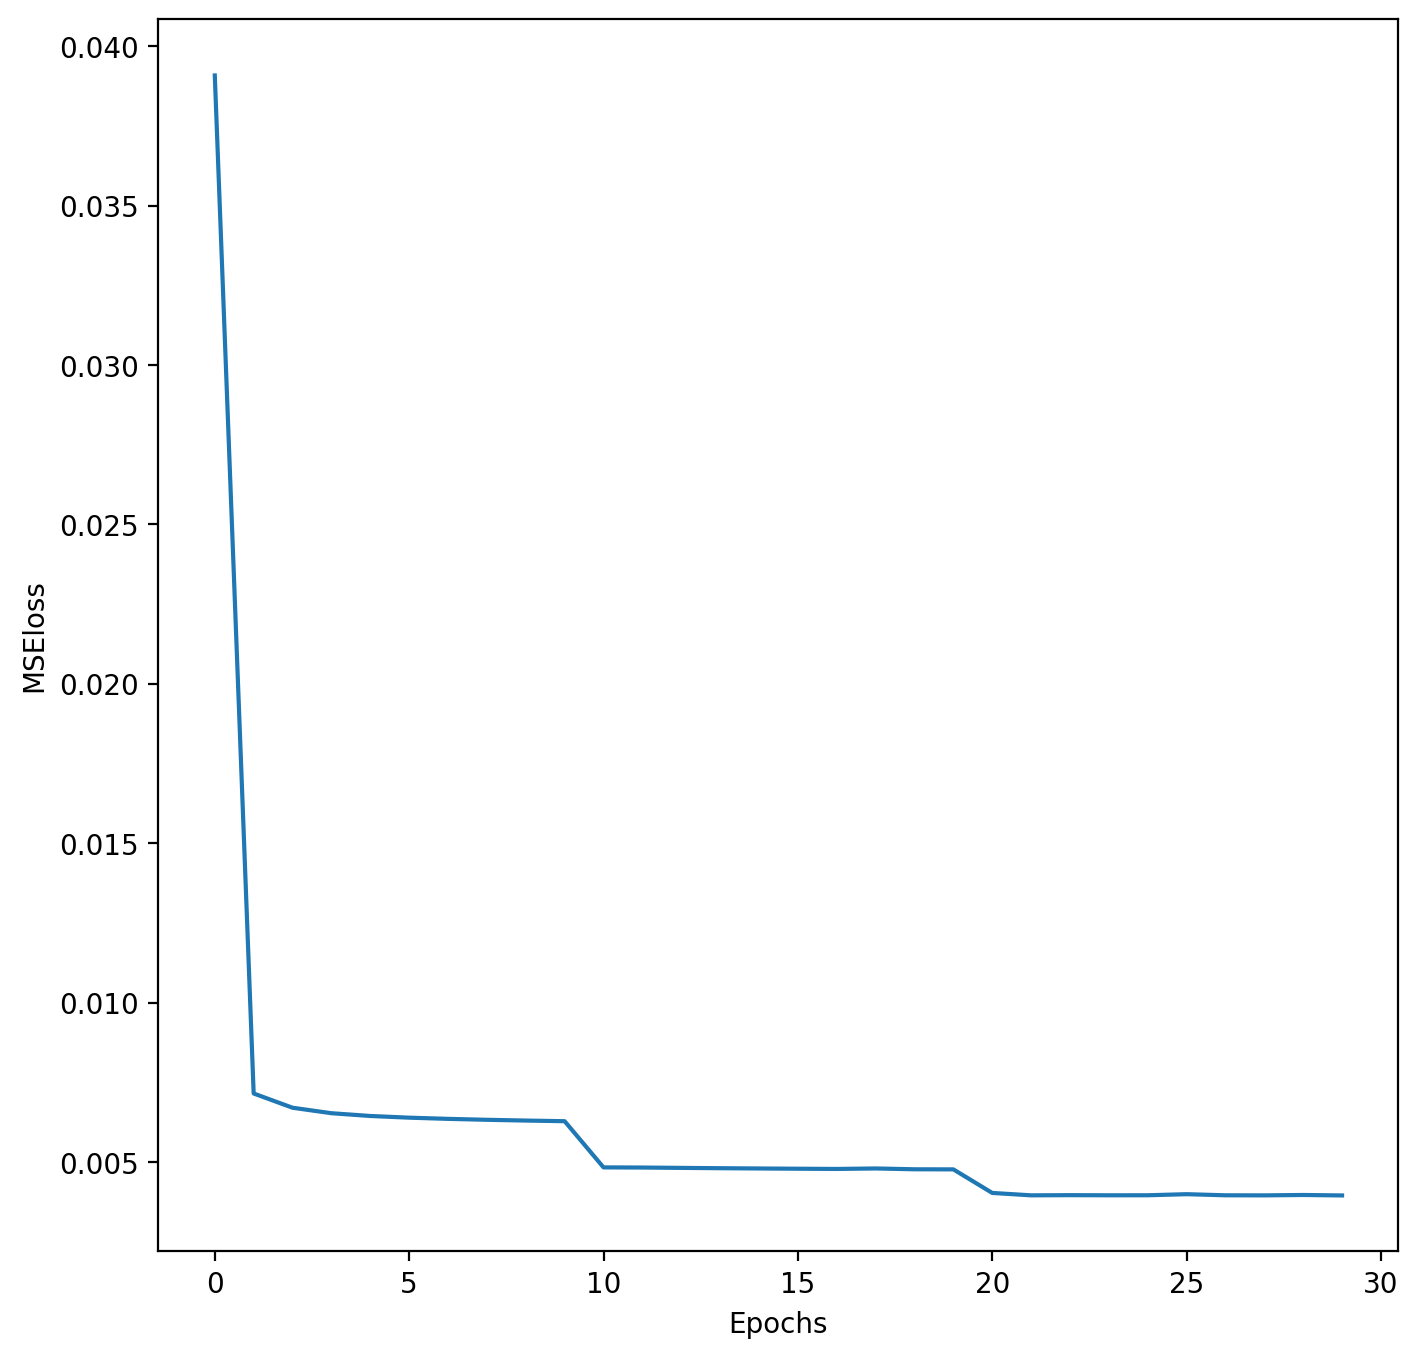

In [125]:
from torch import nn, Tensor
import torch.nn.functional as F
from torch.optim import Adam

train_data = pd.read_csv('./input/train.csv')

# Selecting independent variables (dropping the target variables and non-predictor columns)
X = train_data.drop(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'subject', 'Activity'], axis=1)
X = X.values
# Preparing the dependent variables
y_X = train_data['tBodyAcc-mean()-X']
y_Y = train_data['tBodyAcc-mean()-Y']
y_Z = train_data['tBodyAcc-mean()-Z']
y = y_X.values

n_hidden_units = [3, 5, 8, 10]
max_iter = 300
N, M = X.shape


class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        
        self.linear1 = nn.Linear(M, n_hidden_units)
        self.relu = nn.LeakyReLU()
        self.linear2 = nn.Linear(n_hidden_units, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

model = SimpleNN()

loss_fn = nn.MSELoss()
optim = Adam(model.parameters(), lr=0.001)

K = 10
CV = KFold(K, shuffle=True)

errors = [] # make a list for storing generalizaition error in each loop

for (k, (train_index, test_index)) in enumerate(CV.split(X,y)):
    model.train() # set model to training mode
    print('\nCrossvalidation fold: {0}/{1}'.format(k+1,K))    
    
    X_train = Tensor(X[train_index,:]).squeeze(0)
    y_train = Tensor(y[train_index]).squeeze(0)
    X_test = Tensor(X[test_index,:]).squeeze(0)
    y_test = Tensor(y[test_index]).squeeze(0)
    
    for i in range(max_iter):
        y_train_est = model(X_train)
        
        loss = loss_fn(y_train_est, y_train)
        
        optim.zero_grad()
        loss.backward()
        optim.step()
        
        
        if i % 100 == 0:
            model.eval()
            y_test_est = model(X_test)
            errors.append(loss_fn(y_test_est, y_test).data.numpy())
            print('Iteration {0}/{1}: test error: {2}'.format(i, max_iter, loss_fn(y_test_est, y_test)))
            model.train()

plt.figure(figsize=(8,8))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('MSEloss')
plt.show()

In [147]:
from torch import nn, Tensor
from torch.optim import Adam
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('./input/train.csv')

# Select features and target
X = train_data.drop(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'subject', 'Activity'], axis=1)
X = X.values
y_X = train_data['tBodyAcc-mean()-X'].values

# Define the range of hidden units
hidden_units_options = [1, 2, 3, 5, 8, 10]
max_iter = 100
N, M = X.shape

# ANN model definition
class SimpleNN(nn.Module):
    def __init__(self, n_hidden_units):
        super(SimpleNN, self).__init__()
        self.linear1 = nn.Linear(M, n_hidden_units)
        self.relu = nn.LeakyReLU()
        self.linear2 = nn.Linear(n_hidden_units, 1)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        return x

# Prepare K-fold cross-validation
K = 10
CV = KFold(K, shuffle=True)

# Variables to track the best ANN performance
best_ann_loss = float('inf')
best_ann_fold = None
best_hidden_units = None

# Cross-validation loop
for n_hidden_units in hidden_units_options:
    for fold, (train_index, test_index) in enumerate(CV.split(X, y_X), 1):
        # Initialize the ANN model with the current number of hidden units
        model = SimpleNN(n_hidden_units=n_hidden_units)
        loss_fn = nn.MSELoss()
        optim = Adam(model.parameters(), lr=0.004)

        # Prepare the data tensors
        X_train = Tensor(X[train_index])
        y_train = Tensor(y_X[train_index])
        X_test = Tensor(X[test_index])
        y_test = Tensor(y_X[test_index])

        # Baseline linear regression model
        baseline_model = LinearRegression()
        baseline_model.fit(X_train, y_train)
        baseline_preds = baseline_model.predict(X_test)
        baseline_loss = mean_squared_error(y_test, baseline_preds)

        # Train the ANN model
        for epoch in range(max_iter):
            model.train()
            optim.zero_grad()
            y_pred = model(X_train)
            loss = loss_fn(y_pred, y_train)
            loss.backward()
            optim.step()

            # Evaluate the ANN model
            model.eval()
            with torch.no_grad():
                y_pred_test = model(X_test)
                ann_test_loss = loss_fn(y_pred_test, y_test).item()
    print(f"Fold {fold} hidden neurons {n_hidden_units}: {ann_test_loss}")
    print(f"Baseline test loss: {baseline_loss}")


Fold 1 hidden neurons 1: 0.0033084291499108076
Baseline test loss: 0.0010871997801586986
Fold 2 hidden neurons 1: 0.00928245298564434
Baseline test loss: 0.0012017580447718501
Fold 3 hidden neurons 1: 0.008056043647229671
Baseline test loss: 0.0015410097548738122
Fold 4 hidden neurons 1: 0.005586020648479462
Baseline test loss: 0.002336066449061036
Fold 5 hidden neurons 1: 0.008816051296889782
Baseline test loss: 0.0012372388737276196
Fold 6 hidden neurons 1: 0.0043843830935657024
Baseline test loss: 0.001204514061100781
Fold 7 hidden neurons 1: 0.006191933993250132
Baseline test loss: 0.0013073732843622565
Fold 8 hidden neurons 1: 0.006981437560170889
Baseline test loss: 0.0013559472281485796
Fold 9 hidden neurons 1: 0.006178815849125385
Baseline test loss: 0.0011214509140700102
Fold 10 hidden neurons 1: 0.005265118088573217
Baseline test loss: 0.0010118823265656829
Fold 1 hidden neurons 2: 0.004403013736009598
Baseline test loss: 0.001294725458137691
Fold 2 hidden neurons 2: 0.005642

KeyboardInterrupt: 

In [170]:
from torch import nn, Tensor
from torch.optim import Adam
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge


K = 10
max_iter = 200
hidden_units_options = [1,3,8]
CV = KFold(K, shuffle=True)
# Define the range of lambda values (for simplicity, using 10 logarithmically spaced values between 1e-4 and 1)
lambda_values = np.logspace(-4, 0, 10)

# Initialize a DataFrame to store the results
results = pd.DataFrame(columns=['Fold', 'Best Hidden Units', 'ANN Test Loss', 'Best Lambda', 'Ridge Test Loss', 'Baseline Test Loss'])

# Cross-validation loop
for fold, (train_index, test_index) in enumerate(CV.split(X, y_X), 1):
    fold_best_ann_loss = float('inf')
    fold_best_hidden_units = None
    fold_best_ridge_loss = float('inf')
    fold_best_lambda = None
    
    # Baseline linear regression model for current fold
    baseline_model = LinearRegression()
    baseline_model.fit(X[train_index], y_X[train_index])
    baseline_preds = baseline_model.predict(X[test_index])
    baseline_loss = mean_squared_error(y_X[test_index], baseline_preds)

    for n_hidden_units in hidden_units_options:
        # Initialize the ANN model with the current number of hidden units
        model = SimpleNN(n_hidden_units=n_hidden_units)
        loss_fn = nn.MSELoss()
        optim = Adam(model.parameters(), lr=0.004)
        
        # Prepare the data tensors
        X_train = Tensor(X[train_index])
        y_train = Tensor(y_X[train_index])
        X_test = Tensor(X[test_index])
        y_test = Tensor(y_X[test_index])

        # Train the ANN model
        for epoch in range(max_iter):
            model.train()
            optim.zero_grad()
            y_pred = model(X_train)
            loss = loss_fn(y_pred, y_train)
            loss.backward()
            optim.step()

        # Evaluate the ANN model
        model.eval()
        with torch.no_grad():
            y_pred_test = model(X_test)
            ann_test_loss = loss_fn(y_pred_test, y_test).item()

        # Update best loss and hidden units for current fold
        if ann_test_loss < fold_best_ann_loss:
            fold_best_ann_loss = ann_test_loss
            fold_best_hidden_units = n_hidden_units

    # Ridge Regression for current fold
    for lmbd in lambda_values:
        ridge_model = Ridge(alpha=lmbd)
        ridge_model.fit(X_train, y_train)
        ridge_preds = ridge_model.predict(X_test)
        ridge_loss = mean_squared_error(y_test, ridge_preds)
        
        # Update best loss and lambda for current fold
        if ridge_loss < fold_best_ridge_loss:
            fold_best_ridge_loss = ridge_loss
            fold_best_lambda = lmbd

    # Create a temporary DataFrame to hold the current fold results
    current_results = pd.DataFrame({
        'Fold': [fold],
        'Best Hidden Units': [fold_best_hidden_units],
        'ANN Test Loss': [fold_best_ann_loss],
        'Best Lambda': [fold_best_lambda],
        'Ridge Test Loss': [fold_best_ridge_loss],
        'Baseline Test Loss': [baseline_loss]
    })
    print(current_results)

    # Use concat instead of append
    results = pd.concat([results, current_results], ignore_index=True)

# After all folds have been processed, print the results
print(results)

# You can also save this DataFrame to a CSV file if needed
# results.to_csv('./cross_validation_results.csv', index=False)


   Fold  Best Hidden Units  ANN Test Loss  Best Lambda  Ridge Test Loss  \
0     1                100       0.004902     0.005995         0.001113   

   Baseline Test Loss  
0            0.001119  
   Fold  Best Hidden Units  ANN Test Loss  Best Lambda  Ridge Test Loss  \
0     2                100       0.005046     0.016681         0.001772   

   Baseline Test Loss  
0            0.001803  
   Fold  Best Hidden Units  ANN Test Loss  Best Lambda  Ridge Test Loss  \
0     3                100       0.005913     0.016681         0.001293   

   Baseline Test Loss  
0            0.001336  
   Fold  Best Hidden Units  ANN Test Loss  Best Lambda  Ridge Test Loss  \
0     4                100       0.004938     0.002154         0.001288   

   Baseline Test Loss  
0            0.001329  
   Fold  Best Hidden Units  ANN Test Loss  Best Lambda  Ridge Test Loss  \
0     5                100       0.007445     0.005995         0.001135   

   Baseline Test Loss  
0            0.001157  
   Fo

In [169]:
import pandas as pd
import numpy as np
from scipy.stats import t
from scipy.stats import sem

data = {
    'Fold': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Best Hidden Units': [8, 3, 8, 3, 3, 8, 3, 8, 8, 8],
    'ANN Test Loss': [0.004433, 0.004485, 0.004421, 0.003731, 0.005806, 0.003816, 0.007444, 0.006382, 0.004821, 0.006141],
    'Best Lambda': [0.000100, 0.005995, 0.002154, 1.000000, 0.000100, 0.359381, 0.000278, 0.000100, 0.005995, 0.000100],
    'Ridge Test Loss': [0.001063, 0.000985, 0.001249, 0.001718, 0.001397, 0.001103, 0.001351, 0.001406, 0.001400, 0.001199],
    'Baseline Test Loss': [0.001076, 0.001025, 0.001260, 0.002008, 0.001424, 0.001246, 0.001351, 0.001417, 0.001424, 0.001232]
}
df = pd.DataFrame(data)

df['ANN_vs_Linear'] = df['ANN Test Loss'] - df['Ridge Test Loss']
df['ANN_vs_Baseline'] = df['ANN Test Loss'] - df['Baseline Test Loss']
df['Linear_vs_Baseline'] = df['Ridge Test Loss'] - df['Baseline Test Loss']

n = len(df)
dof = n - 1

def calc_statistics(sample_diff):

    mean_diff = np.mean(sample_diff)

    std_err_diff = sem(sample_diff)

    t_stat = mean_diff / std_err_diff

    p_value = t.sf(np.abs(t_stat), dof) * 2

    conf_int = t.interval(0.95, dof, mean_diff, std_err_diff)
    
    return t_stat, p_value, conf_int

ann_vs_linear_stats = calc_statistics(df['ANN_vs_Linear'])

ann_vs_baseline_stats = calc_statistics(df['ANN_vs_Baseline'])

linear_vs_baseline_stats = calc_statistics(df['Linear_vs_Baseline'])

summary_stats = pd.DataFrame({
    'Comparison': ['ANN vs Linear Regression', 'ANN vs Baseline', 'Linear Regression vs Baseline'],
    'T-Statistic': [ann_vs_linear_stats[0], ann_vs_baseline_stats[0], linear_vs_baseline_stats[0]],
    'P-Value': [ann_vs_linear_stats[1], ann_vs_baseline_stats[1], linear_vs_baseline_stats[1]],
    '95% CI Lower': [ann_vs_linear_stats[2][0], ann_vs_baseline_stats[2][0], linear_vs_baseline_stats[2][0]],
    '95% CI Upper': [ann_vs_linear_stats[2][1], ann_vs_baseline_stats[2][1], linear_vs_baseline_stats[2][1]]
})

print(summary_stats)

                      Comparison  T-Statistic   P-Value  95% CI Lower  \
0       ANN vs Linear Regression     9.981139  0.000004      0.002986   
1                ANN vs Baseline     9.345599  0.000006      0.002881   
2  Linear Regression vs Baseline    -2.065848  0.068825     -0.000124   

   95% CI Upper  
0      0.004736  
1      0.004722  
2      0.000006  


## PCA

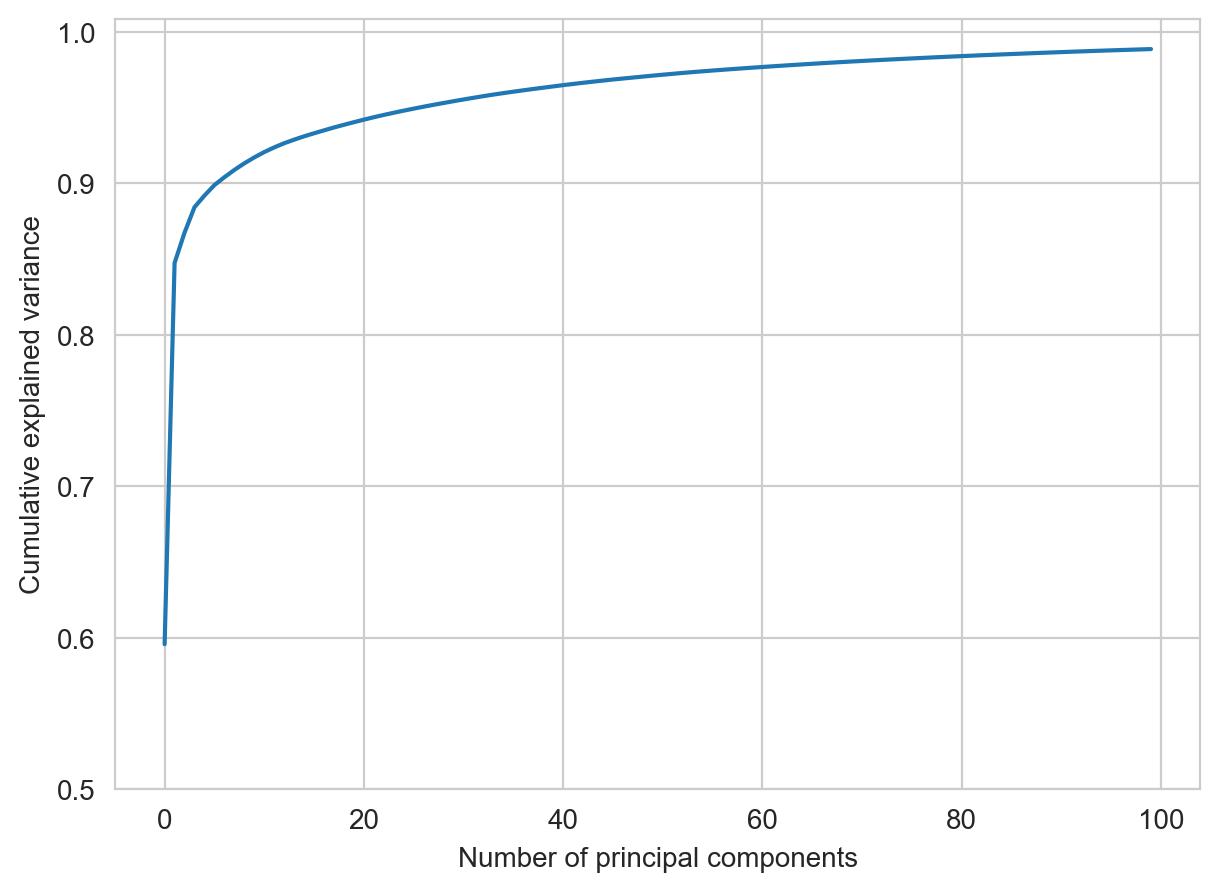

In [ ]:
pca = PCA(100)

#pca.fit(X_test)
#test_x_pca = pca.transform(X_test)

pca.fit(X_train)
train_x_pca = pca.transform(X_train)

plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.yticks(np.arange(0.5,1.01,0.1))
plt.show()

In [ ]:
scaler = StandardScaler()
df = scaler.fit_transform(X_train)
df = pd.DataFrame(df, columns=X_train.columns)
df["label"] = train["Activity"]

In [ ]:
sns.set_style(style="whitegrid")
scaler = StandardScaler()
df = scaler.fit_transform(X_train)
df = pd.DataFrame(df, columns=X_train.columns)

n_components = 3
# fit the PCA model
pca = PCA(n_components)
df = pca.fit_transform(df)

# create a dataframe with the results
df = pd.DataFrame(df, columns=[f'PC{i}' for i in range(1, n_components+1)])
df['label'] = train["Activity"]

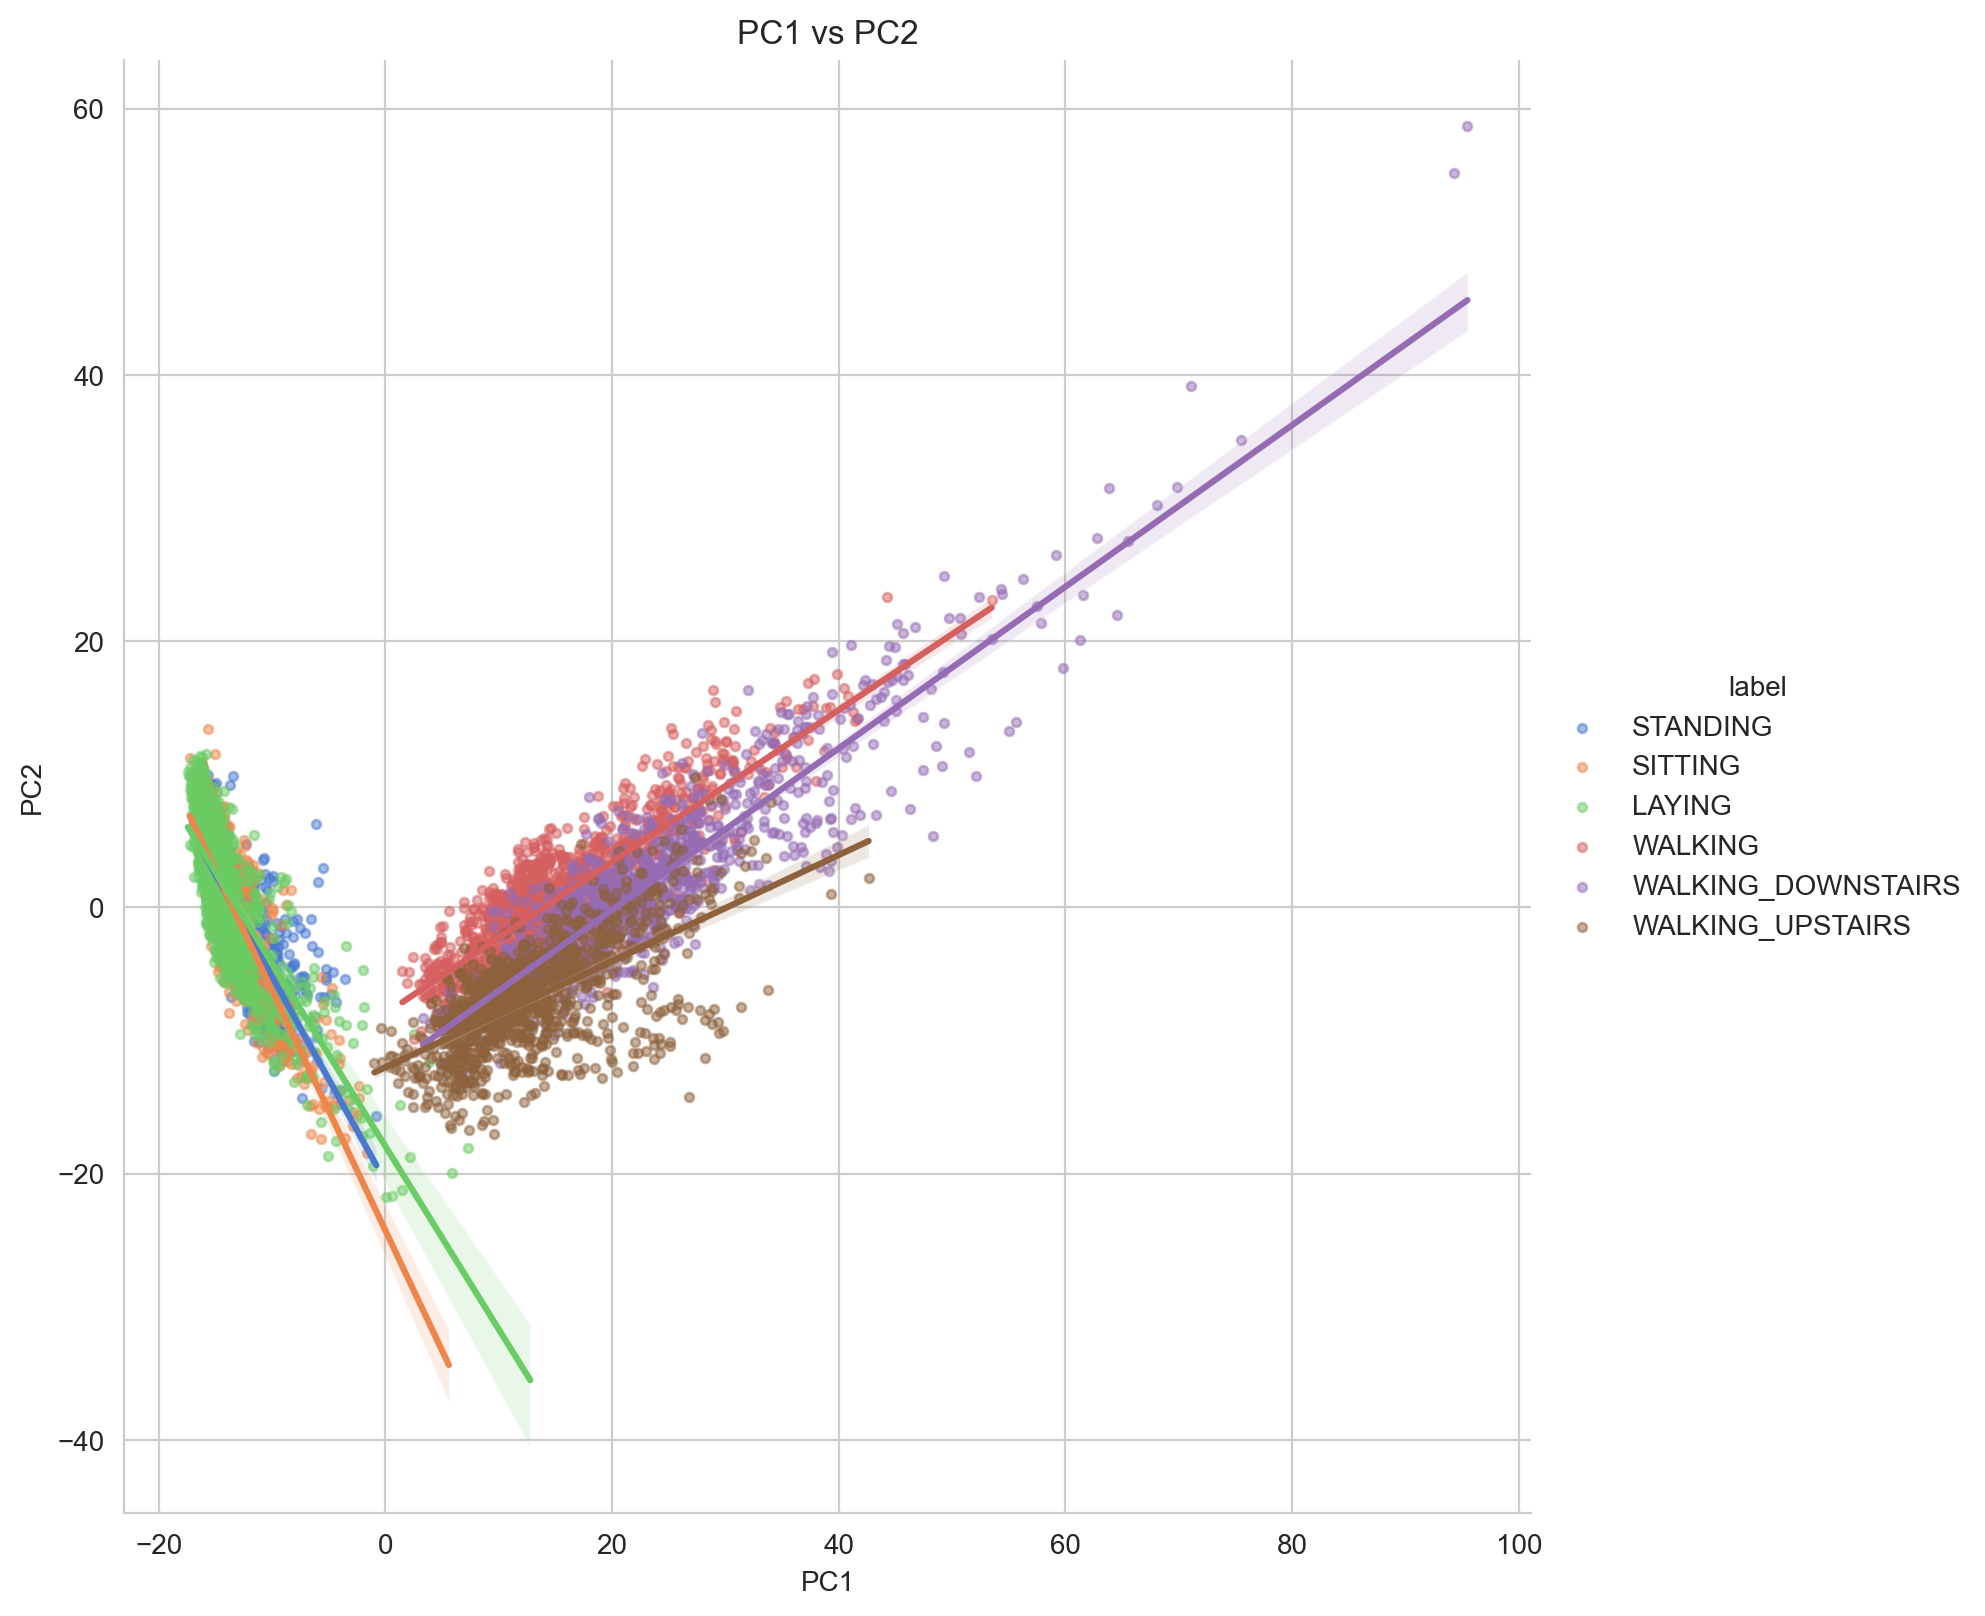

In [ ]:
# plot PC1 vs PC2
sns.lmplot(data=df, x='PC1', y='PC2', hue='label', palette="muted", height=8, scatter_kws={"s": 10, "alpha": 0.5})
plt.title("PC1 vs PC2")
plt.show()

[2 2 2 ... 5 5 5]
[2 2 2 ... 5 5 5]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          246     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.31730D+04    |proj g|=  7.77813D+03

At iterate   50    f=  9.62772D+02    |proj g|=  5.90880D+01

At iterate  100    f=  8.88386D+02    |proj g|=  1.34852D+01

At iterate  150    f=  8.81657D+02    |proj g|=  5.13093D+00

At iterate  200    f=  8.79387D+02    |proj g|=  8.99378D+00

At iterate  250    f=  8.78069D+02    |proj g|=  4.09922D+00

At iterate  300    f=  8.77332D+02    |proj g|=  4.59904D+00

At iterate  350    f=  8.76879D+02    |proj g|=  1.61703D+00

At iterate  400    f=  8.76592D+02    |proj g|=  1.22117D+00

At iterate  450    f=  8.76414D+02    |proj g|=  9.93705D-01

At iterate  500    f=  8.76331D+02    |proj g|=  7.30115D-01

At iterate  550    f=  8.76298D+02    |proj g|=  8.22387D-01

At iterate  600    f=  8.76283D+02    |proj g|=  1.02589D+00

At iterate  650    f=  8.7

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


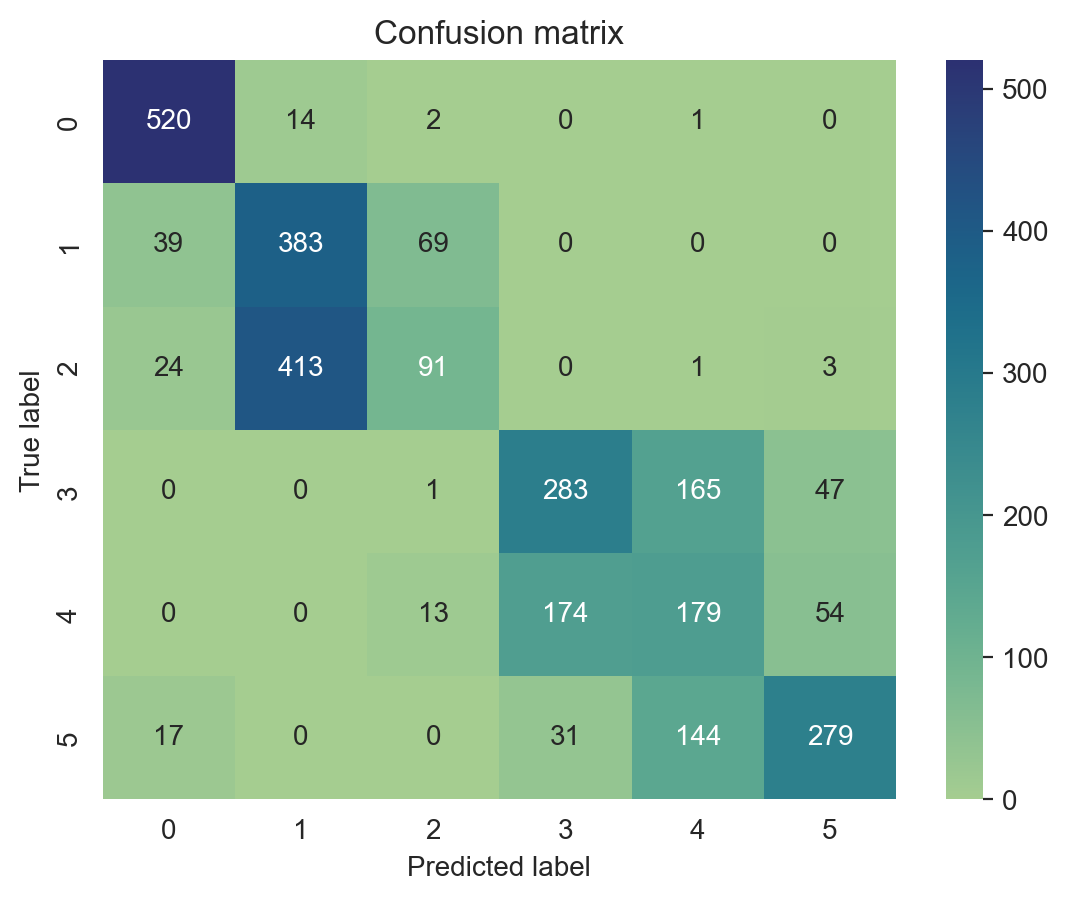

In [ ]:
le = LabelEncoder()
print(Y_train)
Y_train = le.fit_transform(Y_train)
print(Y_train)
pca = PCA(40)

pca.fit(X_train)
train_x_pca = pca.transform(X_train)


pca.fit(X_test)
test_x_pca = pca.transform(X_test)

classifier = LogisticRegression(
    random_state=0,
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1000,
    verbose=1
)

classifier.fit(train_x_pca, Y_train)

y_pred = classifier.predict(test_x_pca)

cm = confusion_matrix(Y_test, y_pred) 
sns.heatmap(cm, annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="crest")
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
print(classification_report(Y_test,y_pred))

print("Accuracy:",accuracy_score(Y_test, y_pred)*100)

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       537
           1       0.47      0.78      0.59       491
           2       0.52      0.17      0.26       532
           3       0.58      0.57      0.58       496
           4       0.37      0.43      0.39       420
           5       0.73      0.59      0.65       471

    accuracy                           0.59      2947
   macro avg       0.59      0.58      0.56      2947
weighted avg       0.60      0.59      0.57      2947

Accuracy: 58.873430607397346
